# 09-2 순환 신경망으로 IMDB 리뷰 분류하기

## 자연어 처리 NLP (Natural Language Processing)
* 말뭉치 - corpus

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(len(train_input[1]))

189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


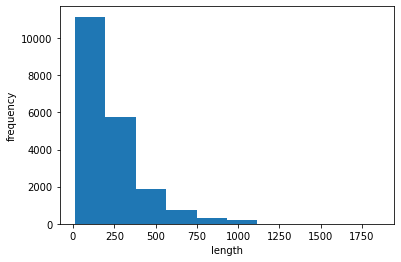

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

### 길이가 300개 미만이어서 100으로 패딩

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_seq[0][-10:])

[  6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn=model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 46s 137ms/step - loss: 0.6995 - accuracy: 0.5053 - val_loss: 0.7015 - val_accuracy: 0.4914
Epoch 2/100
313/313 [==============================] - 42s 135ms/step - loss: 0.6956 - accuracy: 0.5120 - val_loss: 0.6989 - val_accuracy: 0.4990
Epoch 3/100
313/313 [==============================] - 42s 135ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6970 - val_accuracy: 0.5018
Epoch 4/100
313/313 [==============================] - 41s 132ms/step - loss: 0.6906 - accuracy: 0.5290 - val_loss: 0.6956 - val_accuracy: 0.5080
Epoch 5/100
313/313 [==============================] - 40s 128ms/step - loss: 0.6886 - accuracy: 0.5360 - val_loss: 0.6944 - val_accuracy: 0.5128
Epoch 6/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6868 - accuracy: 0.5428 - val_loss: 0.6935 - val_accuracy: 0.5138
Epoch 7/100
313/313 [==============================] - 41s 130ms/step - loss: 0.6850 - accuracy: 0.5521 - val_loss: 0.6926 -

## 훈련 손실 검증 손실

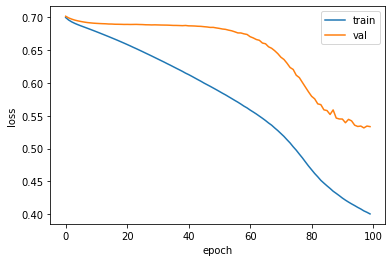

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show() 

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


## 단어 임베딩을 사용하기

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-embedding-model.h5", save_best_only=True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 54s 168ms/step - loss: 0.6944 - accuracy: 0.5066 - val_loss: 0.6923 - val_accuracy: 0.5216
Epoch 2/100
313/313 [==============================] - 53s 170ms/step - loss: 0.6881 - accuracy: 0.5439 - val_loss: 0.6871 - val_accuracy: 0.5514
Epoch 3/100
313/313 [==============================] - 52s 168ms/step - loss: 0.6700 - accuracy: 0.6132 - val_loss: 0.6447 - val_accuracy: 0.6754
Epoch 4/100
313/313 [==============================] - 52s 168ms/step - loss: 0.6238 - accuracy: 0.6988 - val_loss: 0.6109 - val_accuracy: 0.7140
Epoch 5/100
313/313 [==============================] - 53s 170ms/step - loss: 0.5946 - accuracy: 0.7268 - val_loss: 0.5902 - val_accuracy: 0.7262
Epoch 6/100
313/313 [==============================] - 53s 170ms/step - loss: 0.5714 - accuracy: 0.7427 - val_loss: 0.5698 - val_accuracy: 0.7414
Epoch 7/100
313/313 [==============================] - 52s 168ms/step - loss: 0.5519 - accuracy: 0.7552 - val_loss: 0.5646 -

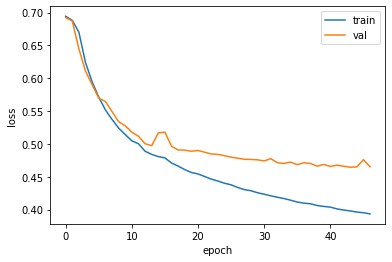

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

# 09-3 LSTM 과 GRU 셀
  * 계산은 SimpleRNN보다 복잡하지만, 성능이 좋아서 순환 신경망에서 많이 채택되고 있다.

## LSTM 구조
* Long Short-Term Memory

## LSTM 신경망 훈련하기 - imdb에 적용

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-lstm-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 22ms/step - loss: 0.6919 - accuracy: 0.5451 - val_loss: 0.6911 - val_accuracy: 0.5688
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6889 - accuracy: 0.6138 - val_loss: 0.6874 - val_accuracy: 0.6140
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6825 - accuracy: 0.6472 - val_loss: 0.6782 - val_accuracy: 0.6522
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6646 - accuracy: 0.6644 - val_loss: 0.6466 - val_accuracy: 0.6750
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5991 - accuracy: 0.7137 - val_loss: 0.5729 - val_accuracy: 0.7388
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5535 - accuracy: 0.7488 - val_loss: 0.5442 - val_accuracy: 0.7486
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5265 - accuracy: 0.7648 - val_loss: 0.5211 - val_accuracy

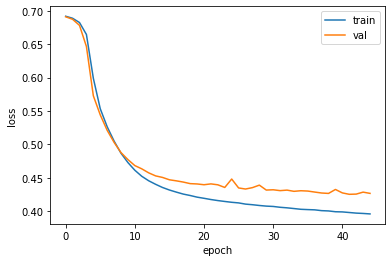

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

## 2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1, activation="sigmoid"))


In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2rnn-model.h5",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 45ms/step - loss: 0.6925 - accuracy: 0.5426 - val_loss: 0.6912 - val_accuracy: 0.6206
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6875 - accuracy: 0.6114 - val_loss: 0.6790 - val_accuracy: 0.6442
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6469 - accuracy: 0.6707 - val_loss: 0.5972 - val_accuracy: 0.6984
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5756 - accuracy: 0.7166 - val_loss: 0.5529 - val_accuracy: 0.7294
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5430 - accuracy: 0.7418 - val_loss: 0.5248 - val_accuracy: 0.7540
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5210 - accuracy: 0.7570 - val_loss: 0.5087 - val_accuracy: 0.7648
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5061 - accuracy: 0.7674 - val_loss: 0.4955 - val_ac

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

## GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2rnn-model.h5",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6924 - accuracy: 0.5209 - val_loss: 0.6919 - val_accuracy: 0.5292
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6902 - accuracy: 0.5734 - val_loss: 0.6893 - val_accuracy: 0.5826
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6865 - accuracy: 0.6044 - val_loss: 0.6848 - val_accuracy: 0.6122
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6803 - accuracy: 0.6289 - val_loss: 0.6775 - val_accuracy: 0.6176
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6703 - accuracy: 0.6391 - val_loss: 0.6660 - val_accuracy: 0.6256
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6546 - accuracy: 0.6503 - val_loss: 0.6484 - val_accuracy: 0.6444
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6302 - accuracy: 0.6697 - val_loss: 0.6196 - val_accuracy:

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

## LSTM과 GRU 셀로 훈련

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model("best-2rnn-model.h5")
rnn_model.evaluate(test_seq, test_target)